In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs 
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized print(e)
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [12]:
import warnings
warnings.filterwarnings('ignore')

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import tensorflow_datasets.public_api as tfds
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler

train_X,train_Y=tfds.load('beans',split='train',as_supervised=True,
                          batch_size=-1)
test_X,test_Y=tfds.load('beans',split='test',as_supervised=True,
                        batch_size=-1)

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(1034, 500, 500, 3)
(1034,)
(128, 500, 500, 3)
(128,)


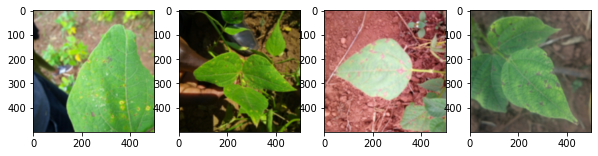

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(train_X[0],interpolation="bicubic")
plt.grid(False)

plt.subplot(1,4,2)
plt.imshow(train_X[4], interpolation="bicubic")
plt.grid(False)

plt.subplot(1,4,3)
plt.imshow(train_X[8],interpolation="bicubic")
plt.grid(False)

plt.subplot(1,4,4)
plt.imshow(train_X[12], interpolation="bicubic")
plt.grid(False)

In [15]:
import cv2
import imutils

resizew=32
resizeh=32

temp_train=np.zeros((train_X.shape[0],resizew,resizeh,3))
for i in range(train_X.shape[0]): 
    temp=train_X[0].numpy()  # tensor object -> ndarray
    temp_resize=imutils.resize(temp,width=resizew,height=resizeh) # resize 
    img_resize=temp_resize.reshape(1,resizew,resizeh,3) # reshape (4차원) 
    temp_train[i]=img_resize #resize-reshape한 것을 temp_train에 저장 
    
temp_test=np.zeros((test_X.shape[0],resizew,resizeh,3))
for i in range(test_X.shape[0]):
    temp=test_X[0].numpy()
    temp_resize=imutils.resize(temp,width=resizew,height=resizeh)
    img_resize=temp_resize.reshape(1,resizew,resizeh,3)
    temp_train[i]=img_resize

train_X=temp_train # 작업한 것을 train_X에 저장
test_X=temp_test

print(train_X.shape)
print(test_X.shape)

(1034, 32, 32, 3)
(128, 32, 32, 3)


In [16]:
classes=3
train_Y=tf.keras.utils.to_categorical(train_Y,num_classes=classes)
test_Y=tf.keras.utils.to_categorical(test_Y,num_classes=classes)
print(test_Y[0])

[1. 0. 0.]


In [6]:
classes=3
train_Y=tf.keras.utils.to_categorical(train_Y,num_classes=classes)
test_Y=tf.keras.utils.to_categorical(test_Y,num_classes=classes)

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(resizew,resizeh,3),activation='relu',kernel_size=(3,3),filters=32,padding='same'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),activation='relu',filters=64,padding='same'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),activation='relu',filters=128,padding='same'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),activation='relu',filters=128),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),activation='relu',filters=128),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),activation='relu',filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=classes,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history=model.fit(train_X,train_Y,epochs=10,validation_split=0.25)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0

In [7]:
model.evaluate(test_X,test_Y,verbose=0)

[19.75325584411621, 0.3359375]

In [34]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}